Carga de librerías

In [17]:
import pandas as pd
import seaborn as sns
%matplotlib inline

Carga de los datos

In [30]:
data=pd.read_csv("real_estate_valuation_data_set.csv",index_col=0,sep=",")
data.columns=["Transaction_date","House_age","d_nearest_MRTstation","num_convinience_stores","latitude","longitude","House_price_unit_area"]
data.shape
data.head()


,Transaction_date,House_age,d_nearest_MRTstation,num_convinience_stores,latitude,longitude,House_price_unit_area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [22]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Graficación de histogramas y dispersión

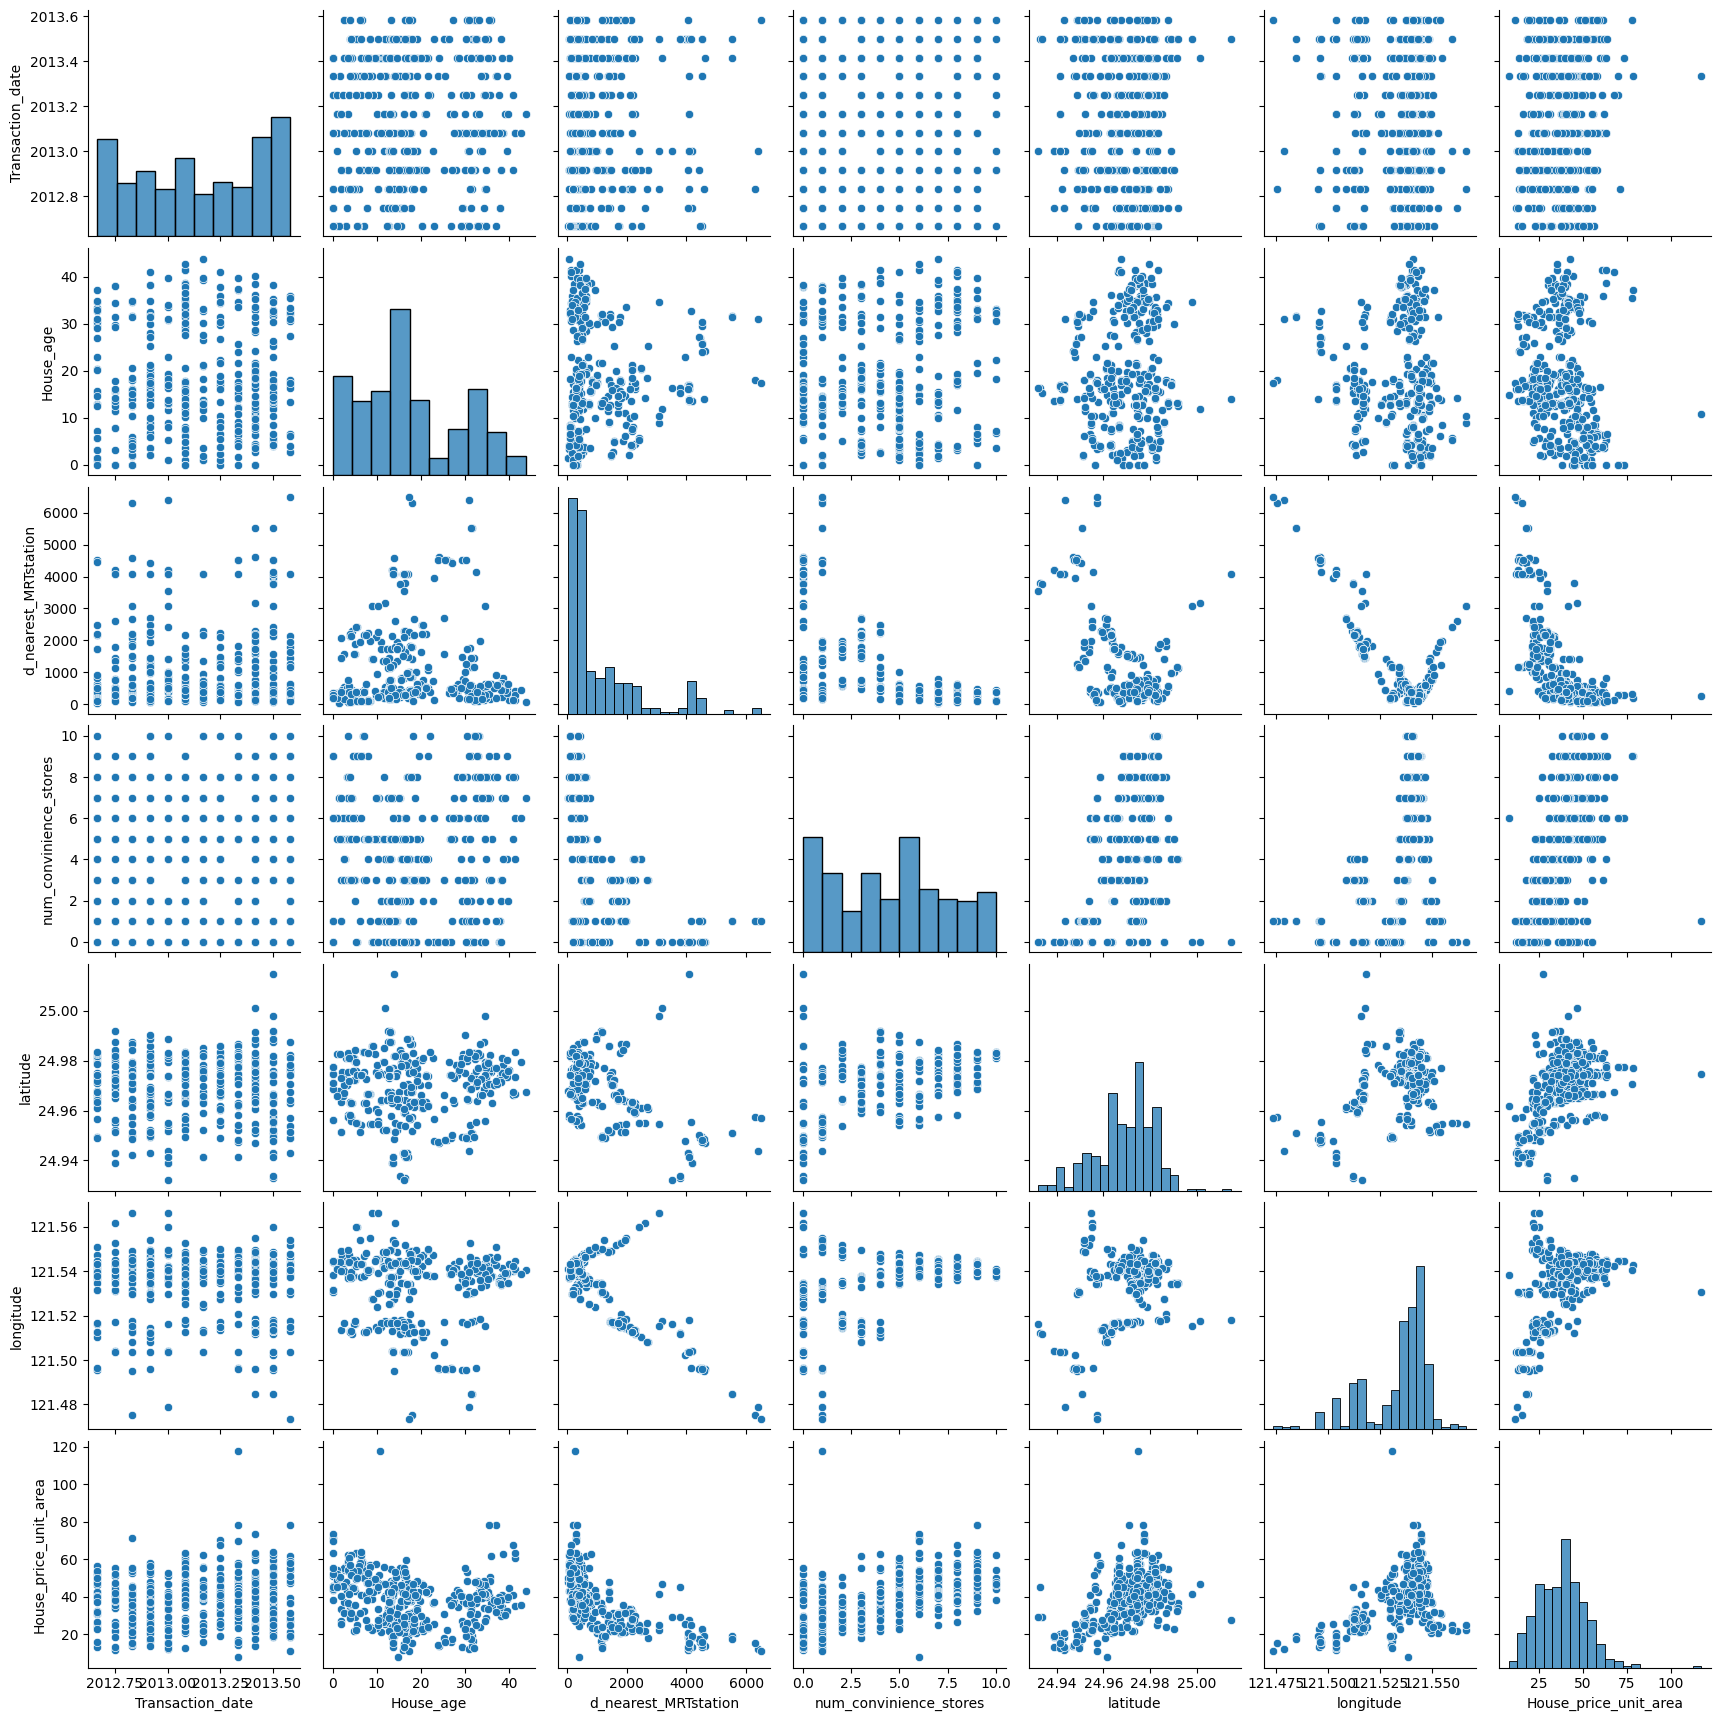

In [31]:
sns.pairplot(data,)

### Correlaciones

<Axes: >

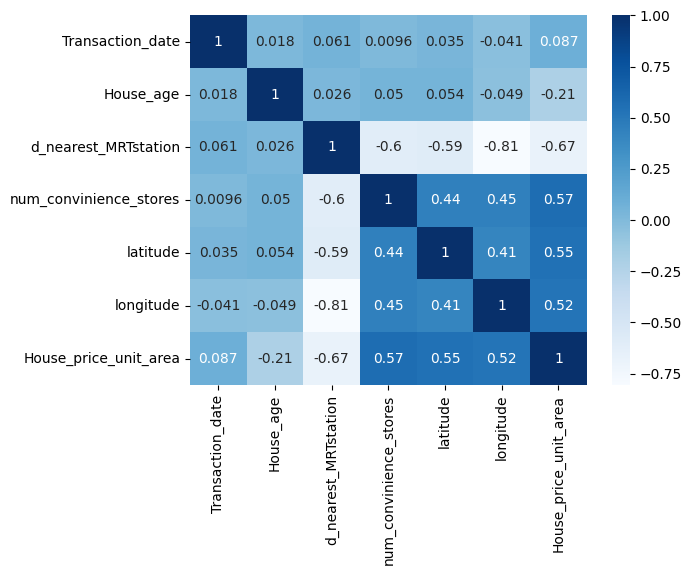

In [52]:
corr = data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

### Dispersión 

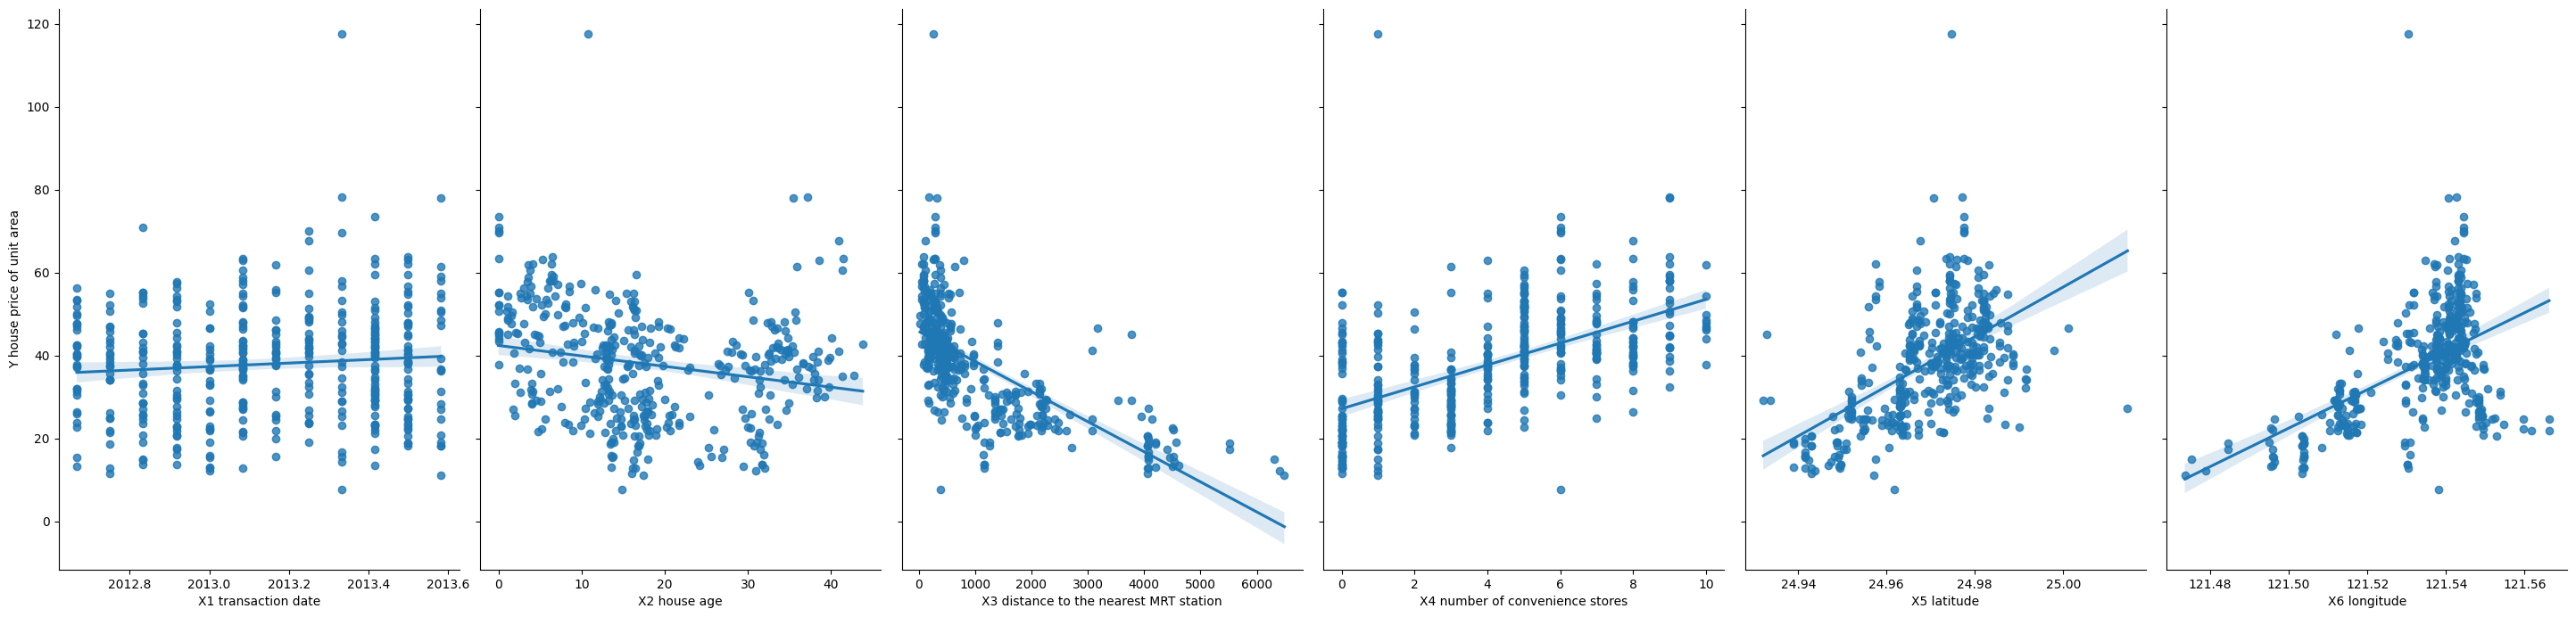

In [28]:
sns.pairplot(data, x_vars=['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude'], y_vars='Y house price of unit area', height=7, aspect=0.7, kind='reg')

### Modelo de regresión

$y=\beta_0+ \beta_1*transactiondate+\beta_2* houseage	+\beta_3*distancetothenearestMRTstation+\beta_4*numberofconveniencestores+\beta_5 *latitude+\beta_6 *longitude$

In [33]:
# nombres de características
features=["Transaction_date","House_age","d_nearest_MRTstation","num_convinience_stores","latitude","longitude"]

# dataframe de características
X = data[features]

X.head()

,Transaction_date,House_age,d_nearest_MRTstation,num_convinience_stores,latitude,longitude
No,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024
2,2012.917,19.5,306.59470,9,24.98034,121.53951
3,2013.583,13.3,561.98450,5,24.98746,121.54391
4,2013.500,13.3,561.98450,5,24.98746,121.54391
5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [35]:
X.shape

(414, 6)

In [36]:
# variable de respuesta
y = data['House_price_unit_area']

y.head()

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: House_price_unit_area, dtype: float64

In [37]:
# tipos de X y y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Divisón entrenamiento-prueba

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [40]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(310, 6)
(310,)
(104, 6)
(104,)


In [41]:
print(X.head())
print(X_train.head())

    Transaction_date  House_age  d_nearest_MRTstation  num_convinience_stores  \
No                                                                              
1           2012.917       32.0              84.87882                      10   
2           2012.917       19.5             306.59470                       9   
3           2013.583       13.3             561.98450                       5   
4           2013.500       13.3             561.98450                       5   
5           2012.833        5.0             390.56840                       5   

    latitude  longitude  
No                       
1   24.98298  121.54024  
2   24.98034  121.53951  
3   24.98746  121.54391  
4   24.98746  121.54391  
5   24.97937  121.54245  
     Transaction_date  House_age  d_nearest_MRTstation  \
No                                                       
369          2013.417       18.2              350.8515   
219          2013.417       13.6              492.2313   
128          2013.

In [58]:
# cambiando el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [43]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(331, 6)
(331,)
(83, 6)
(83,)


In [59]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [45]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

-12796.117684899287
[ 5.71714218e+00 -2.49326467e-01 -4.93769843e-03  1.07614509e+00
  2.27037100e+02 -3.56988335e+01]


In [61]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

[('Transaction_date', 4.12730470760849),
 ('House_age', -0.22716941858012757),
 ('d_nearest_MRTstation', -0.0041808194697654484),
 ('num_convinience_stores', 1.1948487440337898),
 ('latitude', 222.60997865174664),
 ('longitude', -3.0922771653045933)]

In [62]:
#predicción con datos de prueba
y_pred = linreg.predict(X_test)

#### MSE, MAE y RMSE - Evaluación del modelo

In [48]:
from sklearn import metrics
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  5.343030944663339
MSE:  45.01050719519749
RMSE:  6.708987046879543


## Validación cruzada

In [49]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[ 49.89813853  89.0294996   57.865991   134.82397694  60.0535528 ]


In [50]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 7.06386145  9.43554448  7.6069699  11.61137274  7.74942274]


In [51]:
# RMSE promedio a través de todos los grupos
print(rmse_scores.mean())

8.693434260346503


## Análisis con Statsmodels

In [64]:
import statsmodels.api as sm

features =["Transaction_date","House_age","d_nearest_MRTstation","num_convinience_stores","latitude","longitude"]

X = data[features]
y = data.House_price_unit_area

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     House_price_unit_area   R-squared:                       0.543
Model:                               OLS   Adj. R-squared:                  0.534
Method:                    Least Squares   F-statistic:                     60.00
Date:                   Thu, 08 Feb 2024   Prob (F-statistic):           1.05e-48
Time:                           16:09:56   Log-Likelihood:                -1129.0
No. Observations:                    310   AIC:                             2272.
Df Residuals:                        303   BIC:                             2298.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

c:\Users\camil\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='House_age', ylabel='House_price_unit_area'>

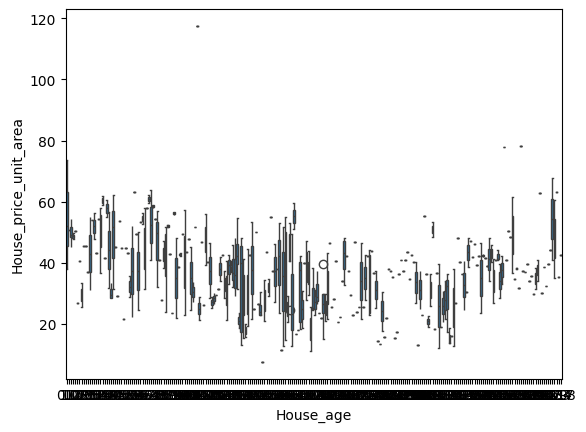

In [67]:
sns.boxplot(x=data.House_age, y=data.House_price_unit_area)